# TP PRSTA 2026

Auteurs: Charly Saugey, Paul Haardt

## Imports pour le TP

In [7]:
import pandas as pdp
import matplotlib.pyplot as plt


## Chargement des données

In [5]:
df = pd.read_csv("data/data.csv", header=0)
df = df[["Ageinyears", "AcademicPerformanceLastorCurrentAcademicYear", "ScreentimeHoursDayMobileTablet"]]
df = df.sort_values(by="Ageinyears")


print(df.head())


     Ageinyears  AcademicPerformanceLastorCurrentAcademicYear  \
532           8                                     88.455834   
524           8                                     88.809560   
505           8                                     79.523241   
508           8                                     62.972816   
486           8                                     60.304194   

     ScreentimeHoursDayMobileTablet  
532                        3.378017  
524                        1.632516  
505                        3.576876  
508                        1.292822  
486                        5.495109  


## Affiche les données de manière humainement compréhensible

/tmp/ipykernel_18328/1024074789.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  screentime_performance_stats = df.groupby('ScreenTimeBin')['AcademicPerformanceLastorCurrentAcademicYear'].agg(['mean', 'std'])


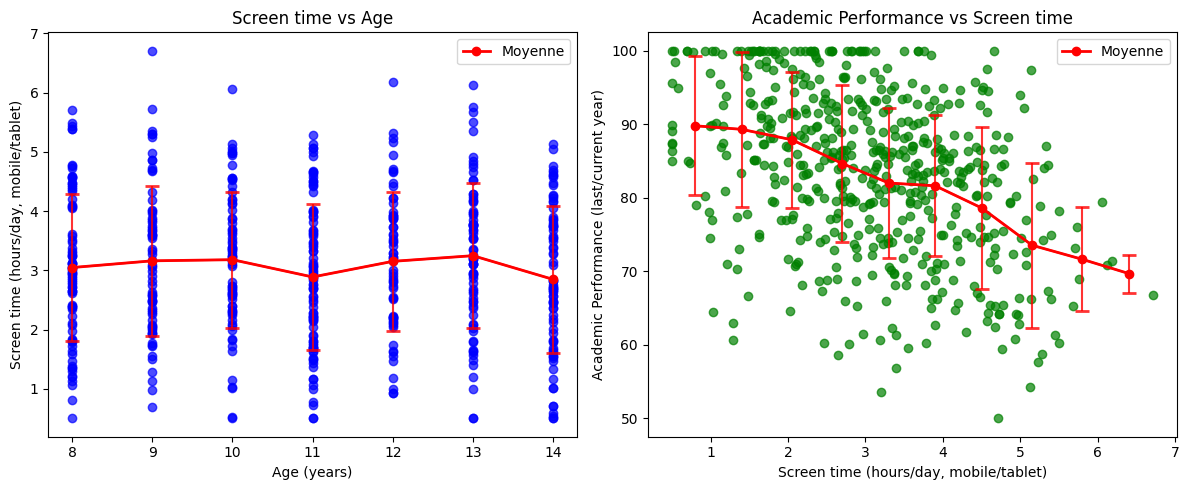

In [10]:
plt.figure(figsize=(12, 5))

# Premier graphique: Temps d'écran vs Âge
plt.subplot(1, 2, 1)
plt.scatter(df["Ageinyears"], df["ScreentimeHoursDayMobileTablet"], color='blue', alpha=0.7)
plt.xlabel("Age (years)")
plt.ylabel("Screen time (hours/day, mobile/tablet)")
plt.title("Screen time vs Age")

# Calculer la moyenne et l'écart type du temps d'écran par âge
age_screentime_stats = df.groupby("Ageinyears")["ScreentimeHoursDayMobileTablet"].agg(['mean', 'std'])
plt.plot(age_screentime_stats.index, age_screentime_stats['mean'], color='red', linewidth=2, marker='o', markersize=6, label='Moyenne')
# Ajouter les barres d'erreur pour l'écart type
plt.errorbar(age_screentime_stats.index, age_screentime_stats['mean'], yerr=age_screentime_stats['std'], 
             color='red', capsize=5, capthick=2, alpha=0.8)
plt.legend()

# Deuxième graphique: Performance académique vs Temps d'écran
plt.subplot(1, 2, 2)
plt.scatter(df["ScreentimeHoursDayMobileTablet"], df["AcademicPerformanceLastorCurrentAcademicYear"], color='green', alpha=0.7)
plt.xlabel("Screen time (hours/day, mobile/tablet)")
plt.ylabel("Academic Performance (last/current year)")
plt.title("Academic Performance vs Screen time")

# Calculer la moyenne et l'écart type de la performance académique par temps d'écran
# On va créer des bins pour le temps d'écran pour avoir une courbe plus lisse
df['ScreenTimeBin'] = pd.cut(df['ScreentimeHoursDayMobileTablet'], bins=10, precision=1)
screentime_performance_stats = df.groupby('ScreenTimeBin')['AcademicPerformanceLastorCurrentAcademicYear'].agg(['mean', 'std'])

# Obtenir les valeurs centrales des bins pour l'axe x
bin_centers = [interval.mid for interval in screentime_performance_stats.index]
plt.plot(bin_centers, screentime_performance_stats['mean'], color='red', linewidth=2, marker='o', markersize=6, label='Moyenne')
# Ajouter les barres d'erreur pour l'écart type
plt.errorbar(bin_centers, screentime_performance_stats['mean'], yerr=screentime_performance_stats['std'], 
             color='red', capsize=5, capthick=2, alpha=0.8)
plt.legend()

plt.tight_layout()
plt.show()
